In [20]:
import numpy as np
from matplotlib import pyplot as plt

### Defining Sigmoid Function

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Parameters Initialization

In [22]:
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    
    parameters = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2}
    
    return parameters
    

### Implementing Forward propagation

In [23]:
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (W1, A1, Z1, b1, W2, A2, Z2, b2)
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -1/m*np.sum(logprobs)
    
    return cost, cache, A2

### Implementing Backward Propagation

In [24]:
def backPropagation(X, Y, cache):
    m = X.shape[1]
    (W1, A1, Z1, b1, W2, A2, Z2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * A1 * (1 - A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dZ1": dZ1, "dW1": dW1, "db1": db1,
        "dZ2": dZ2, "dW2": dW2, "db2": db2}
    
    return gradients
    
    

### Updating parameters

In [25]:
def updateParameters(parameters, gradients, alpha):
    parameters["W1"] = parameters["W1"] - alpha * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - alpha * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - alpha * gradients["db1"]
    parameters["b2"] = parameters["b2"] - alpha * gradients["db2"]
    
    return parameters

### Training data

In [26]:
X = np.array([[1, 0, 1, 0],
             [1, 1, 0, 0]])

Y = np.array([[1, 0, 0, 0]])

### Training model with parameters

In [27]:
neuronsInHiddenLayers = 4
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 10000
alpha = 0.01
losses = np.zeros((epoch, 1))

In [28]:
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, alpha)
    

### Evaluating performance

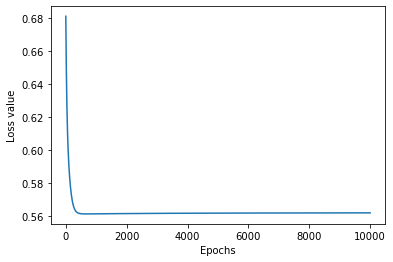

In [29]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.show()

### Testing result

In [31]:
X = np.array([[1, 1, 0, 1],
             [0, 1, 1, 0]])
# Y = np.array([[0, 0, 0, 0]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)

[[0. 0. 0. 0.]]
